In [ ]:
http://holoviews.org/reference/elements/bokeh/HeatMap.html

In [ ]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

In [ ]:
%%opts HeatMap [tools=['hover'] colorbar=True width=325 toolbar='above']
hv.HeatMap((np.random.randint(0, 10, 100), np.random.randint(0, 10, 100),
            np.random.randn(100), np.random.randn(100)), vdims=['z', 'z2']).redim.range(z=(-2, 2))

In [ ]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoview import streams
hv.extension('bokeh', width = 90)

df = pd.read_csv("~/Downloads/Biller-data-metadata.tsv", sep = "\t")
df

In [ ]:
import numpy as np
import holoviews as hv
import pandas as pd
hv.extension('bokeh')

In [ ]:
url = 'https://raw.githubusercontent.com/blmoore/blogR/master/data/measles_incidence.csv'
data = pd.read_csv(url, skiprows=2, na_values='-')

yearly_data = data.drop('WEEK', axis=1).groupby('YEAR').sum().reset_index()
measles = pd.melt(yearly_data, id_vars=['YEAR'], var_name='State', value_name='Incidence')

heatmap = hv.HeatMap(measles, label='Measles Incidence')
aggregate = hv.Dataset(heatmap).aggregate('YEAR', np.mean, np.std)

vline = hv.VLine(1963)
marker = hv.Text(1964, 800, 'Vaccine introduction', halign='left')

agg = hv.ErrorBars(aggregate) * hv.Curve(aggregate)

In [ ]:
hm_opts = dict(width=900, height=500, tools=['hover'], logz=True, invert_yaxis=True,
            xrotation=90, labelled=[], toolbar='above', xaxis=None)
overlay_opts = dict(width=900, height=200, show_title=False)
vline_opts = dict(line_color='black')

opts = {'HeatMap': {'plot': hm_opts}, 'Overlay': {'plot': overlay_opts}, 'VLine': {'style': vline_opts}}

(heatmap + agg * vline * marker)(opts).cols(1)

In [ ]:
import numpy as np
import holoviews as hv
import pandas as pd
hv.extension('bokeh')

data2 = pd.read_csv("~/Downloads/bats-coverage.tsv", sep = "\t")
abundance = pd.melt(data2, id_vars=['contig'], var_name='biller', value_name='abundance')
%opts HeatMap [width=1500 height=750 logz=True fontsize={'xticks': '8pt'} tools=['hover'] colorbar=True toolbar='above' xrotation=90] (cmap='RdBu_r') 
hv.HeatMap(abundance, label='abundance of contigs')
#hv.renderer('bokeh').save(heatmap,'out')

In [ ]:
import numpy as np
import holoviews as hv
import pandas as pd
from bokeh.models import HoverTool
hv.extension('bokeh')

hover = HoverTool(tooltips=[
    ("Contig", "@contig"),
    ("Biller", "@biller"),
    ("Abundance", "@abundance"),
    ("Date Sampled", "@Date"),
    ("Depth(m)", "@Depth"),
    ("Ocean", "@Ocean"),
    ("Study", "@Location"),
    ("Longitude", "@Lon"),
    ("Latitude", "@Lat"),
    ("Cruise No.", "@cruise_id"),
    ("Cruise Loc", "@cruise_station")
])
data1 = pd.read_csv("/home/minion/Downloads/Biller-data-metadata.tsv", "\t")
data2 = pd.read_csv("~/Downloads/bats-coverage.tsv", "\t")
abundance = pd.melt(data2, id_vars=['contig'], var_name='biller', value_name='abundance')
abundancemetadata = abundance.join(data1.set_index('biller'), on='biller')
%opts HeatMap [width=1500 height=750 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
heatmap = hv.HeatMap(abundancemetadata, on="contigs", value = "abundance", index = "biller", label='abundance of contigs')
heatmap
#hv.renderer('bokeh').save(heatmap,'/home/minion/Downloads/Biller-data-out.html')
#abundance

In [ ]:
import pandas as pd
df1 = pd.read_csv('sar202-cellular-coverage.tsv', index_col=0)
df2 = pd.read_csv('viral-coverage.tsv', index_col=0)
df1 = df1.transpose()
df2 = df2.transpose()
df3 = df1.join(df2)
df4 = df3.transpose()
df4.to_csv("joined_data.tsv", sep="\t")

In [ ]:
import numpy as np
import holoviews as hv
import pandas as pd
hv.extension('bokeh')

data = pd.read_csv('/home/minion/projects/heatmaps/OSU_BB03.csv')
abundance = pd.melt(data, id_vars=['contig'], var_name='biller', value_name='abundance')
%opts HeatMap [width=1750 height=7500 logz=True fontsize={'xticks': '8pt'} tools=['hover'] xrotation=90] (cmap='RdYlBu_r') 
heatmap = hv.HeatMap(abundance, label='abundance of contigs')
heatmap
#hv.renderer('bokeh').save(heatmap,'/home/minion/projects/heatmaps/OSU_BB03_abundance_heatmap.html')

In [ ]:
for i in $(cat sar202-contig-names.tsv); 
do cat joined_data.tsv |egrep "contig|$i*" > $i.coverage.tsv
done

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
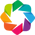

In [5]:
import numpy as np
import holoviews as hv
import pandas as pd
from bokeh.models import HoverTool
hv.extension('bokeh')

hover = HoverTool(tooltips=[
    ("Contig", "@contig"),
    ("Biller", "@biller"),
    ("Abundance", "@abundance"),
    ("Date Sampled", "@Date"),
    ("Depth(m)", "@Depth"),
    ("Ocean", "@Ocean"),
    ("Study", "@Location"),
    ("Longitude", "@Lon"),
    ("Latitude", "@Lat"),
    ("Cruise No.", "@cruise_id"),
    ("Cruise Loc", "@cruise_station")
])
metadata = pd.read_csv("/home/minion/Downloads/Biller-data-metadata.tsv", "\t")
hots = pd.read_csv("/home/minion/projects/heatmaps/with_viral/hots.csv")
bats = pd.read_csv("/home/minion/projects/heatmaps/with_viral/bats.csv")
ga02 = pd.read_csv("/home/minion/projects/heatmaps/with_viral/ga02.csv")
ga03 = pd.read_csv("/home/minion/projects/heatmaps/with_viral/ga03.csv")
ga10 = pd.read_csv("/home/minion/projects/heatmaps/with_viral/ga10.csv")
ga13 = pd.read_csv("/home/minion/projects/heatmaps/with_viral/ga13.csv")

hots = pd.melt(hots, id_vars=['contig'], var_name='biller', value_name='abundance')
bats = pd.melt(bats, id_vars=['contig'], var_name='biller', value_name='abundance')
ga02 = pd.melt(ga02, id_vars=['contig'], var_name='biller', value_name='abundance')
ga03 = pd.melt(ga03, id_vars=['contig'], var_name='biller', value_name='abundance')
ga10 = pd.melt(ga10, id_vars=['contig'], var_name='biller', value_name='abundance')
ga13 = pd.melt(ga13, id_vars=['contig'], var_name='biller', value_name='abundance')

hots = hots.join(metadata.set_index('biller'), on='biller')
bats = bats.join(metadata.set_index('biller'), on='biller')
ga02 = ga02.join(metadata.set_index('biller'), on='biller')
ga03 = ga03.join(metadata.set_index('biller'), on='biller')
ga10 = ga10.join(metadata.set_index('biller'), on='biller')
ga13 = ga13.join(metadata.set_index('biller'), on='biller')

In [7]:
hots

hots.sort_values(by=["Depth"])

contig      biller  abundance        Date  Depth    Ocean Location  \
0        LSU_GOM1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
2059     OSU_TB57  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2058  OSU_TB56_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2057     OSU_TB56  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2056  OSU_TB15_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2055     OSU_TB15  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2054  OSU_TB07_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2053     OSU_TB07  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2052  OSU_BB03_v1  SRR5720329   0.032100  2004-01-21    5.0  Pacific    ALOHA   
2051     OSU_BB03  SRR5720329   0.018366  2004-01-21    5.0  Pacific    ALOHA   
2050    MPNN01_v2  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2049    MPNN01_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2048       MPNN01  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2047    MPMM01_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2046       MPMM01  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2045    MPMJ01_v3  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2044    MPMJ01_v2  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2043    MPMJ01_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2042       MPMJ01  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2041  LSU_GOM1_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2040     LSU_GOM1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
1839  USC_TB94_v3  SRR5720294   0.000000  2003-06-19    5.0  Pacific    ALOHA   
1838  USC_TB94_v2  SRR5720294   0.000000  2003-06-19    5.0  Pacific    ALOHA   
1837  USC_TB94_v1  SRR5720294   0.000000  2003-06-19    5.0  Pacific    ALOHA   
2060  OSU_TB57_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2061  OSU_TB57_v2  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2062     OSU_ZL03  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
2063  OSU_ZL03_v1  SRR5720329   0.000000  2004-01-21    5.0  Pacific    ALOHA   
553   USC_TB72_v1  SRR5720247   0.000000  2003-01-17    5.0  Pacific    ALOHA   
554      USC_TB74  SRR5720247   0.000000  2003-01-17    5.0  Pacific    ALOHA   
...           ...         ...        ...         ...    ...      ...      ...   
2118  USC_TB94_v2  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2021  OSU_TB57_v2  SRR5720267   0.000000  2003-02-25  175.0  Pacific    ALOHA   
2104     USC_TB67  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2102     OSU_ZL03  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
1362       MPMJ01  SRR5720239   0.000000  2003-01-17  175.0  Pacific    ALOHA   
1361  LSU_GOM1_v1  SRR5720239   0.000000  2003-01-17  175.0  Pacific    ALOHA   
2080     LSU_GOM1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2081  LSU_GOM1_v1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2082       MPMJ01  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2083    MPMJ01_v1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2084    MPMJ01_v2  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2085    MPMJ01_v3  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2086       MPMM01  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2087    MPMM01_v1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2088       MPNN01  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2103  OSU_ZL03_v1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2089    MPNN01_v1  SRR5720297   0.000000  2004-05-18  175.0  Pacific    ALOHA   
2091     OSU_BB03  SRR5720297   0.105553  

In [9]:
%opts HeatMap [radial=False invert_axes=True width=975 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
hots_heatmap = hv.HeatMap(hots, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.HeatMap(hots_heatmap).sort()
hv.renderer('bokeh').save(hots_heatmap,'/home/minion/projects/heatmaps/with_viral/hots-heatmap.html')

hots_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [6]:
%opts HeatMap [invert_axes=True width=975 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
bats_heatmap = hv.HeatMap(bats, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.renderer('bokeh').save(bats_heatmap,'/home/minion/projects/heatmaps/with_viral/bats-heatmap.html')
bats_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [7]:
%opts HeatMap [invert_axes=True width=1750 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
ga02_heatmap = hv.HeatMap(ga02, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.renderer('bokeh').save(ga02_heatmap,'/home/minion/projects/heatmaps/with_viral/ga02-heatmap.html')
ga02_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [8]:
%opts HeatMap [invert_axes=True width=1750 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
ga03_heatmap = hv.HeatMap(ga03, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.renderer('bokeh').save(ga03_heatmap,'/home/minion/projects/heatmaps/with_viral/ga03-heatmap.html')
ga03_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [9]:
%opts HeatMap [invert_axes=True width=975 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
ga10_heatmap = hv.HeatMap(ga10, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.renderer('bokeh').save(ga10_heatmap,'/home/minion/projects/heatmaps/with_viral/ga10-heatmap.html')
ga10_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [10]:
%opts HeatMap [invert_axes=True width=2250 height=650 logz=True fontsize={'xticks': '8pt'} tools=[hover] colorbar=True toolbar='above' xrotation=90] (cmap='RdYlBu_r') 
ga13_heatmap = hv.HeatMap(ga13, on="contigs", value = "biller", index = "abundance", label='abundance of contigs')
hv.renderer('bokeh').save(ga13_heatmap,'/home/minion/projects/heatmaps/with_viral/ga13-heatmap.html')
ga13_heatmap

:HeatMap   [contig,biller]   (abundance,Date,Depth,Ocean,Location,Lon,Lat,cruise_id,cruise_station)

In [ ]:
https://www.researchgate.net/profile/Paul_Cardenas/publication/232257272/figure/fig1/AS:300642288586759@1448690115526/Phylogenetic-tree-and-Heatmap-of-bacterial-16S-rRNA-sequences-derived-from-throat-swabs.png

In [2]:
import pandas as pd
hots = pd.read_csv("/home/minion/projects/heatmaps/with_viral/hots.csv")
hots

contig  SRR5720227  SRR5720222  SRR5720219  SRR5720241  SRR5720228  \
0      LSU_GOM1           0           0           0    0.000000    0.000000   
1   LSU_GOM1_v1           0           0           0    0.000000    0.000000   
2        MPMJ01           0           0           0    0.000000    0.000000   
3     MPMJ01_v1           0           0           0    0.000000    0.000000   
4     MPMJ01_v2           0           0           0    0.000000    0.000000   
5     MPMJ01_v3           0           0           0    0.000000    0.000000   
6        MPMM01           0           0           0    0.000000    0.000000   
7     MPMM01_v1           0           0           0    0.000000    0.000000   
8        MPNN01           0           0           0    0.000000    0.000000   
9     MPNN01_v1           0           0           0    0.000000    0.000000   
10    MPNN01_v2           0           0           0    0.000000    0.000000   
11     OSU_BB03           0           0           0    0.003652    0.378072   
12  OSU_BB03_v1           0           0           0    0.000000    0.912500   
13     OSU_TB07           0           0           0    0.000000    0.000000   
14  OSU_TB07_v1           0           0           0    0.000000    0.000000   
15     OSU_TB15           0           0           0    0.000000    0.000000   
16  OSU_TB15_v1           0           0           0    0.000000    0.000000   
17     OSU_TB56           0           0           0    0.000000    0.000000   
18  OSU_TB56_v1           0           0           0    0.000000    0.000000   
19     OSU_TB57           0           0           0    0.000000    0.000000   
20  OSU_TB57_v1           0           0           0    0.000000    0.000000   
21  OSU_TB57_v2           0           0           0    0.000000    0.000000   
22     OSU_ZL03           0           0           0    0.000000    0.000000   
23  OSU_ZL03_v1           0           0           0    0.000000    0.000000   
24     USC_TB67           0           0           0    0.000000    0.000000   
25  USC_TB67_v1           0           0           0    0.000000    0.000000   
26  USC_TB67_v2           0           0           0    0.000000    0.000000   
27  USC_TB67_v3           0           0           0    0.000000    0.000000   
28     USC_TB68           0           0           0    0.000000    0.128950   
29  USC_TB68_v1           0           0           0    0.000000    0.000000   
30     USC_TB69           0           0           0    0.000000    0.000000   
31  USC_TB69_v1           0           0           0    0.000000    0.000000   
32     USC_TB72           0           0           0    0.000000    0.033589   
33  USC_TB72_v1           0           0           0    0.000000    0.000000   
34     USC_TB74           0           0           0    0.000000    0.000000   
35  USC_TB74_v1           0           0           0    0.000000    0.000000   
36     USC_TB94           0           0           0    0.000000    0.000000   
37  USC_TB94_v1           0           0           0    0.000000    0.000000   
38  USC_TB94_v2           0           0           0    0.000000    0.000000   
39  USC_TB94_v3           0           0           0    0.000000    0.000000   

    SRR5720246  SRR5720220  SRR5720266  SRR5720223     ...      SRR5720311  \
0     0.000000    0.000000           0    0.000000     ...        0.000000   
1     0.000000    0.000000           0    0.000000     ...        0.000000   
2     0.000000    0.000000           0    0.000000     ...        0.000000   
3     0.000000    0.000000           0    0.000000     ...        0.000000   
4     0.000000    0.000000           0    0.000000     ...        0.000000   
5     0.000000    0.000000           0    0.000000     ...        0.000000   
6     0.000000    0.000000           0    0.000000     ...        0.000000   
7     0.000000    0.000000           0    0.000000     ...        0.000000   
8     0.000000    0.000000           0    0.000000     ...        0

In [43]:
df
https://elitedatascience.com/python-seaborn-tutorial

contig      biller  abundance        Date  Depth    Ocean Location  \
0        LSU_GOM1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
1     LSU_GOM1_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
2          MPMJ01  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
3       MPMJ01_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
4       MPMJ01_v2  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
5       MPMJ01_v3  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
6          MPMM01  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
7       MPMM01_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
8          MPNN01  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
9       MPNN01_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
10      MPNN01_v2  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
11       OSU_BB03  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
12    OSU_BB03_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
13       OSU_TB07  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
14    OSU_TB07_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
15       OSU_TB15  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
16    OSU_TB15_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
17       OSU_TB56  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
18    OSU_TB56_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
19       OSU_TB57  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
20    OSU_TB57_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
21    OSU_TB57_v2  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
22       OSU_ZL03  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
23    OSU_ZL03_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
24       USC_TB67  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
25    USC_TB67_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
26    USC_TB67_v2  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
27    USC_TB67_v3  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
28       USC_TB68  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
29    USC_TB68_v1  SRR5720227   0.000000  2004-08-15    5.0  Pacific    ALOHA   
...           ...         ...        ...         ...    ...      ...      ...   
2690    MPNN01_v2  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2691     OSU_BB03  SRR6507278   2.797137  2009-11-04  100.0  Pacific    ALOHA   
2692  OSU_BB03_v1  SRR6507278   7.203900  2009-11-04  100.0  Pacific    ALOHA   
2693     OSU_TB07  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2694  OSU_TB07_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2695     OSU_TB15  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2696  OSU_TB15_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2697     OSU_TB56  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2698  OSU_TB56_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2699     OSU_TB57  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2700  OSU_TB57_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2701  OSU_TB57_v2  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2702     OSU_ZL03  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2703  OSU_ZL03_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2704     USC_TB67  SRR6507278   0.402658  2009-11-04  100.0  Pacific    ALOHA   
2705  USC_TB67_v1  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2706  USC_TB67_v2  SRR6507278   0.000000  2009-11-04  100.0  Pacific    ALOHA   
2707  USC_TB67_v3  SRR6507278   0.000000  

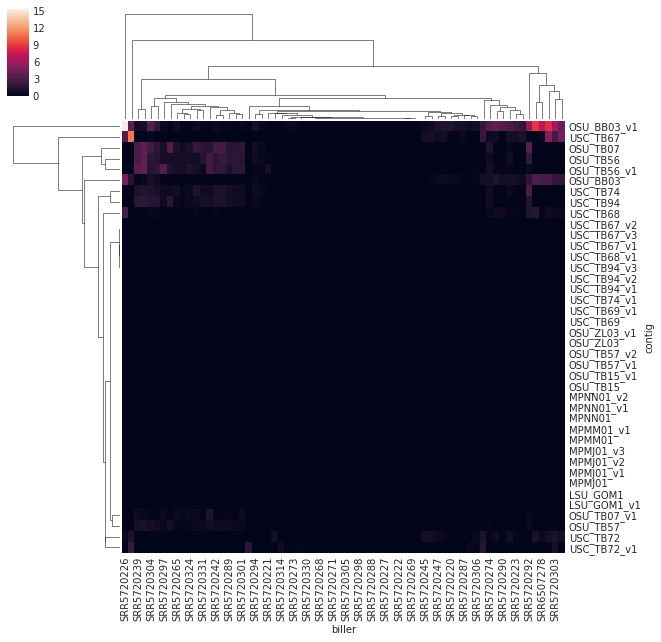

In [108]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

metadata = pd.read_csv("/home/minion/Downloads/Biller-data-metadata.tsv", "\t")
hots = pd.read_csv("/home/minion/projects/heatmaps/with_viral/hots.csv")
df = pd.melt(hots, id_vars=['contig'], var_name='biller', value_name='abundance')
df = df.join(metadata.set_index('biller'), on='biller')

#sns.lmplot(x='Depth', y='abundance', data = df,
#          fit_reg=False, hue='cruise_id')
#
#plt.ylim(0, None)
#plt.xlim(0, None)

#stats_df = df.drop(["abundance"], axis=1)
#sns.boxplot(data=stats_df)

#sns.set_style("whitegrid")
#plt.figure(figsize=(10,6))
#
#sns.violinplot(x="Depth", 
#               y="abundance", 
#               data=df,
#              inner=None) # remove internal bars
#
#
#sns.swarmplot(x="Depth", 
#              y="abundance", 
#              data=df,
#             color="k", #make the points black
#             alpha=0.7)

#corr = stats_df.corr()
#sns.heatmap(corr)

biller = pd.concat([df["contig"], df["biller"], df["abundance"]], axis=1)
biller = biller.pivot("contig", "biller", "abundance")
sns.clustermap(biller)

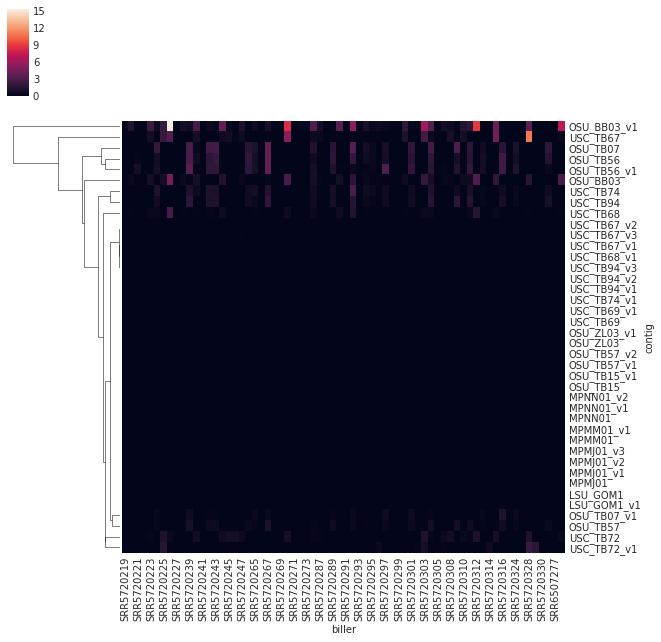

In [109]:
sns.clustermap(biller, col_cluster=False)

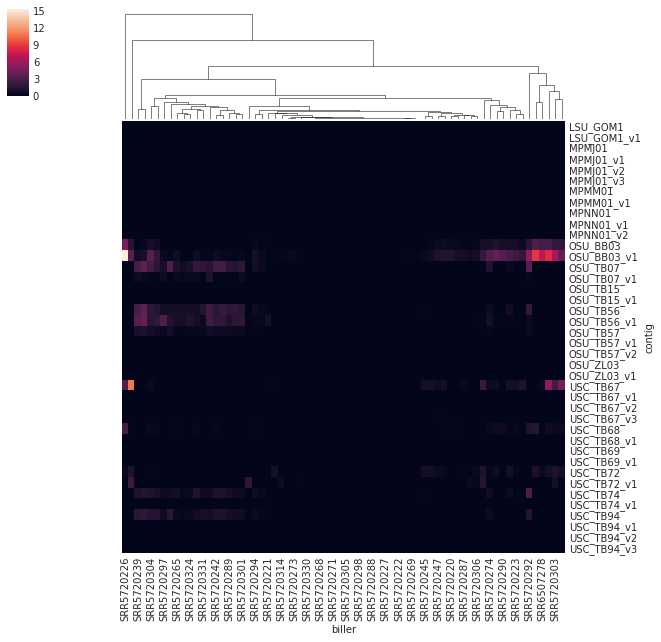

In [110]:
sns.clustermap(biller, row_cluster=False)

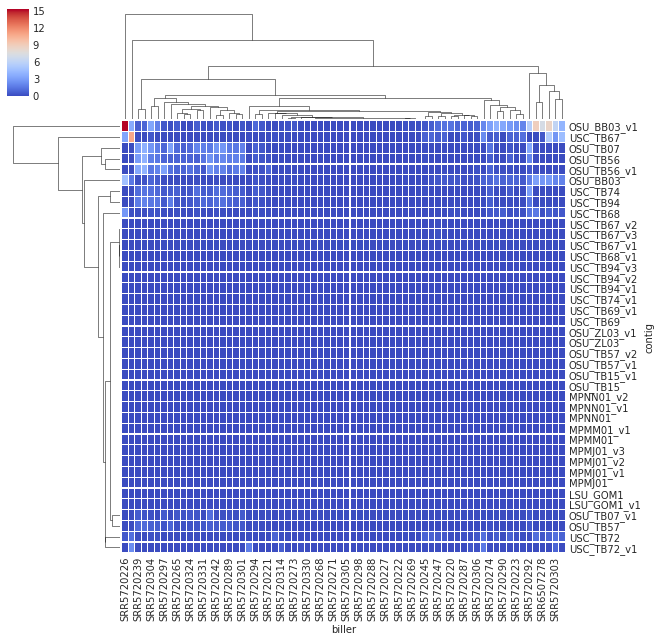

In [115]:
sns.clustermap(biller, cmap='coolwarm', linewidths = 0.01)

In [2]:
import pandas as pd
cells = pd.read_csv("/home/minion/Downloads/FINAL_sar202_cellular_coverage_RPKM.tsv", sep = "\t")
cells

#contig    SRR5720222    SRR5720219    SRR5720227    SRR5720228  \
0    LSU_GOM1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    LSU_GOM2  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2      MPMJ01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3      MPMM01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4      MPNC01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5      MPND01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6      MPNN01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
7    OSU_BB01  0.000000e+00  2.234360e-14  0.000000e+00  1.231257e-12   
8    OSU_BB02  0.000000e+00  0.000000e+00  0.000000e+00  6.346684e-15   
9    OSU_BB03  1.091772e-12  2.203079e-12  4.961973e-13  4.610866e-11   
10   OSU_BB04  0.000000e+00  0.000000e+00  0.000000e+00  6.346684e-15   
11   OSU_BB05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12   OSU_BB06  1.577005e-12  2.095830e-12  2.905660e-13  3.420862e-11   
13   OSU_BB07  7.339137e-12  5.706556e-12  4.278026e-12  4.366518e-12   
14   OSU_BB08  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
15   OSU_BB09  0.000000e+00  0.000000e+00  0.000000e+00  1.586671e-14   
16   OSU_BB10  0.000000e+00  0.000000e+00  0.000000e+00  1.904005e-14   
17   OSU_BB11  7.581753e-15  0.000000e+00  0.000000e+00  1.904005e-14   
18   OSU_NS01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
19   OSU_NS02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
20   OSU_NS03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
21   OSU_NS04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
22   OSU_NS05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
23   OSU_NS06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
24   OSU_NS07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25   OSU_NS08  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
26   OSU_NS09  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
27   OSU_NS10  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
28   OSU_TB01  0.000000e+00  0.000000e+00  0.000000e+00  2.538673e-14   
29   OSU_TB02  3.790876e-15  4.468721e-15  0.000000e+00  3.808010e-14   
..        ...           ...           ...           ...           ...   
92   OSU_ZL03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
93   OSU_ZL04  0.000000e+00  0.000000e+00  0.000000e+00  1.269337e-14   
94   OSU_ZL05  0.000000e+00  0.000000e+00  0.000000e+00  9.520025e-15   
95   UM_GB_B1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
96   USC_TB66  3.108519e-13  5.719962e-13  1.475181e-13  1.320110e-12   
97   USC_TB67  0.000000e+00  1.787488e-14  2.235123e-14  1.050376e-12   
98   USC_TB68  3.790876e-15  2.234360e-14  0.000000e+00  2.310193e-12   
99   USC_TB69  0.000000e+00  8.937441e-15  0.000000e+00  3.490676e-14   
100  USC_TB70  0.000000e+00  0.000000e+00  0.000000e+00  4.696546e-13   
101  USC_TB71  0.000000e+00  0.000000e+00  0.000000e+00  1.904005e-14   
102  USC_TB72  1.213080e-13  8.937441e-14  2.235123e-14  3.040061e-12   
103  USC_TB74  0.000000e+00  0.000000e+00  0.000000e+00  1.523204e-13   
104  USC_TB75  0.000000e+00  0.000000e+00  0.000000e+00  4.347478e-13   
105  USC_TB76  0.000000e+00  0.000000e+00  0.000000e+00  3.109875e-13   
106  USC_TB78  0.000000e+00  0.000000e+00  0.000000e+00  3.173342e-15   
107  USC_TB79  0.000000e+00  0.000000e+00  0.000000e+00  1.396270e-13   
108  USC_TB80  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
109  USC_TB81  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
110  USC_TB82  3.790876e-15  2.681232e-14  0.000000e+00  8.250689e-14   
111  USC_TB84  0.000000e+00  0.000000e+00  0.000000e+00  6.346684e-15   
112  USC_TB85  0.000000e+00  0.000000e+00  0.000000e+00  1.586671e-14   
113  USC_TB86  0.000000e+00  0.000000e+00  0.000000e+00  1.269337e-14   
114  USC_TB87  0.000000e+00  0.000000e+00  0.000000e+00  0.00000

In [3]:
viral = pd.read_csv("/home/minion/Downloads/FINAL_sar202_viral_coverage_RPKM.tsv", sep = "\t")
viral

#contig    SRR5720219    SRR5720227    SRR5720222  \
0   LSU_GOM1_GOM1_103_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
1     MPMJ01_MPMJ_030_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
2     MPMJ01_MPMJ_042_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
3     MPMJ01_MPMJ_057_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
4     MPMM01_MPMM_027_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
5     MPNN01_MPNN_009_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
6     MPNN01_MPNN_017_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
7   OSU_BB03_BB03_050_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
8   OSU_TB07_TB07_119_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
9   OSU_TB15_TB15_231_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
10  OSU_TB56_TB56_024_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
11  OSU_TB57_TB57_007_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
12  OSU_TB57_TB57_009_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
13  OSU_ZL03_ZL03_105_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
14  USC_TB67_TB67_001_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
15  USC_TB67_TB67_009_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
16  USC_TB67_TB67_058_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
17  USC_TB68_TB68_001_000000000001  2.234360e-14  2.682148e-14  1.137263e-14   
18  USC_TB69_TB69_007_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
19  USC_TB72_TB72_055_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
20  USC_TB74_TB74_018_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
21  USC_TB94_TB94_020_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
22  USC_TB94_TB94_025_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   
23  USC_TB94_TB94_028_000000000001  0.000000e+00  0.000000e+00  0.000000e+00   

      SRR5720221    SRR5720220    SRR5720223    SRR5720230    SRR5720228  \
0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
7   1.990002e-08  6.313316e-13  6.920452e-13  3.777964e-13  2.570407e-13   
8   6.766007e-08  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
9   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
10  3.184003e-07  4.856397e-14  2.398176e-14  1.770921e-14  1.269337e-14   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
13  3.980004e-09  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
14  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
15  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
16  0.000000e+00  0.000000e+00  0.000000e+00  2.951535e-15  0.000000e+00   
17  0.000000e+00  1.079199e-14  0.000000e+00  0.000000e+00  3.173342e-15   
18  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
19  0.000000e+00  0.000000e+00  0.000000e+00  2.951535e-15  0.000000e+00   
20  0.000000e+00  0.000000e+00  0.000000e+00  2.951535e-15  0.000000e+00   
21  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
22  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
23  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

      SRR5720224      ...         SRR5788460    SRR5788466    SRR6507277  \
0   0.000000e+00      ...       0.000000e+00  0.0